In [19]:
import shapefile
from pandas import DataFrame
from geopandas import GeoDataFrame
from shapely.geometry import Point
# read the shapefile
reader = shapefile.Reader("../philly/STR_Centerline/Street_Centerline.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type="Feature", \
    geometry=geom, properties=atr))

# write the GeoJSON file
buffer = str(buffer)
from json import dumps
gjson = open("../philly/GeoJSON_data/Street_Centerline.json", "w+")
gjson.write(dumps({"type": "FeatureCollection",\
"features": buffer}, indent=2) + "\n")
gjson.close()

In [1]:
%pylab inline
import geopandas as gpd
from geopandas.tools import sjoin
import pandas as pd
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [37]:
# street_gpd_2.crs = fiona.crs.from_epsg(102729)
street_gpd_2.crs = {'init':'epsg:102729'}

In [2]:
import geojson, json

(41022, 31)


,0,1,2,3,4
CLASS,3,3,3,5,4
FNODE_,2,2,1,6,5
LENGTH,449.863,540.083,446.104,447.261,148.216
LPOLY_,0,0,0,0,0
L_F_ADD,1500,400,1600,1600,350
L_HUNDRED,1500,400,1600,1600,300
L_T_ADD,1598,498,1698,1698,398
MULTI_REP,0,0,0,0,0
NEWSEGDATE,None,None,None,None,None
ONEWAY,FT,TF,FT,TF,TF


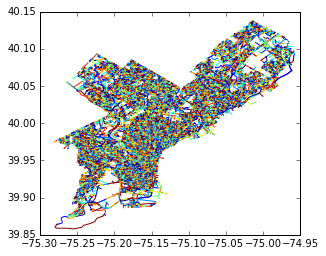

In [3]:
street_gpd = gpd.read_file('../philly/GeoJSON_data/Street_Centerline_qgis3.geojson')
street_gpd.plot()
print(street_gpd.shape)
street_gpd.head().T

In [4]:
collision_gpd = gpd.read_file('../philly/GeoJSON_data/GIS_HEALTH.Collisions_crash_2011_2014PUBV.geojson')
print(collision_gpd.shape)

(43488, 54)


In [5]:
collision_gpd.head().T

,0,1,2,3,4
AUTOMOBILE_COUNT,0,1,1,1,0
BELTED_DEATH_COUNT,0,0,0,0,0
BELTED_MAJ_INJ_COUNT,0,0,0,0,0
BICYCLE_COUNT,0,1,1,0,0
BICYCLE_DEATH_COUNT,0,0,0,0,0
BICYCLE_MAJ_INJ_COUNT,0,0,0,0,0
BUS_COUNT,0,0,0,0,0
COLLISION_TYPE,1,4,4,8,8
COMM_VEH_COUNT,1,0,0,0,0
CRASH_MONTH,8,8,8,8,8


In [6]:
street_gpd[street_gpd.SEG_ID==960283]

,CLASS,FNODE_,LENGTH,LPOLY_,L_F_ADD,L_HUNDRED,L_T_ADD,MULTI_REP,NEWSEGDATE,ONEWAY,...,STREETLABE,ST_CODE,ST_NAME,ST_TYPE,SUF_DIR,TNODE_,UPDATE_,ZIP_LEFT,ZIP_RIGHT,geometry
22464,2,16299,439.229039,0,9400,9400,9498,0,None,B,...,BUSTLETON AVE,20020,BUSTLETON,AVE,None,16543,1998-10-08,19115,19115,LINESTRING (-75.038401134496 40.08447396565553...


In [7]:
collision_gpd[collision_gpd.CRASH_YEAR=='2014'].shape

(10627, 54)

In [8]:
collision_gpd.groupby(collision_gpd.CRASH_YEAR).size()

CRASH_YEAR
2011    10668
2012    11196
2013    10997
2014    10627
dtype: int64

In [9]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    from math import radians, cos, sin, asin, sqrt
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    m = km *1000
    return m   
def ptfromln(pt, ln):
    n_pt = ln.interpolate(ln.project(pt))
    lon1, lat1 = n_pt.coords[0]
    lon2, lat2 = pt.coords[0]
    return haversine(lon1, lat1, lon2, lat2)
def pts2seg(pts, gp_segs, buffer_dis=50, near_dis_thres=5):
    pts_crs,gp_segs_crs = pts.to_crs(epsg=3559), gp_segs.to_crs(epsg=3559)
    pts_crs_bfr = pts_crs.copy()

    pts_crs_bfr.geometry = pts_crs_bfr.buffer(near_dis_thres*1.1)
    close_jn = gpd.tools.sjoin(pts_crs_bfr, gp_segs_crs)[['OBJECTID','SEG_ID_right']]
    handledid = set(pd.unique(close_jn.OBJECTID))
    mask = (~pts_crs_bfr.OBJECTID.isin(handledid))

    far_jns = []
    while pts_crs_bfr[mask].shape[0]!=0:
        pts_crs_bfr.loc[mask, 'geometry'] = pts_crs_bfr[mask].buffer(buffer_dis)
        jn = gpd.tools.sjoin(pts_crs_bfr[mask], gp_segs_crs)[['OBJECTID','SEG_ID_right']]
        far_jns.append(jn)
        handledid |= set(pd.unique(jn.OBJECTID))
        mask = (~pts_crs_bfr.OBJECTID.isin(handledid))
        
    far_jns = pd.concat(far_jns)
    mr = pd.merge(gp_segs[['geometry','SEG_ID']],far_jns , left_on='SEG_ID', right_on='SEG_ID_right')
    #mr = pd.merge(pts[['OBJECTID','geometry','SEG_ID']],mr, left_on='OBJECTID', right_on='OBJECTID_left')
    mr['dis']=mr.apply(lambda x: ptfromln(x.geometry_x, x.geometry_y),axis=1)
    result = close_jn.groupby('OBJECTID')['SEG_ID_right'].apply(list).append(mr.groupby('OBJECTID').apply(lambda x: [x.ix[x.dis.idxmin()].SEG_ID_y]))
    return pd.DataFrame(result, columns=['segid'])

In [40]:
philly_seg_stats = street_gpd[['SEG_ID', 'SHAPE_LEN', 'geometry']]
philly_seg_stats.shape

(41022, 3)

In [49]:
collision_pt_seg = pts2seg(collision_gpd, philly_seg_stats)

ValueError: need at least one array to concatenate

In [ ]:
seg_counts = pd.DataFrame(pd.Series(list(chain.from_iterable(vision0_pts_seg.values.ravel()))).value_counts(),columns=["vision0_pts_seg"])

In [12]:
philly_seg_buffer_gp = street_gpd[['SEG_ID','STCL2_ID','geometry']].copy()
philly_seg_buffer_gp.geometry = philly_seg_buffer_gp.buffer(0.0001)
collision_buffer_gp = collision_gpd[['SEG_ID','OBJECTID', 'geometry','CRASH_YEAR']].copy()
collision_buffer_gp.geometry = collision_buffer_gp.buffer(0.0001)
joined = sjoin(collision_buffer_gp, philly_seg_buffer_gp, how='left', op='intersects')

In [91]:
philly_seg_buffer_gp = street_gpd[['SEG_ID','STCL2_ID','geometry']].copy()
philly_seg_buffer_gp.geometry = philly_seg_buffer_gp.buffer(0.0001)

In [42]:
print(philly_seg_buffer_gp.shape)
philly_seg_buffer_gp.head().T

(41022, 3)


,0,1,2,3,4
SEG_ID,420708,422065,420702,420732,420718
STCL2_ID,85205,86540,85199,85229,85215
geometry,"POLYGON ((2692954.035913117 238893.638507401, ...","POLYGON ((2693439.911167583 239131.2080263407,...","POLYGON ((2692511.692965856 238951.4471188142,...","POLYGON ((2692493.394445261 238804.3647359097,...","POLYGON ((2692511.692879579 238951.4472303169,..."


In [55]:
collision_buffer_gp = collision_gpd[['SEG_ID','OBJECTID','geometry','CRASH_YEAR']].copy()
collision_buffer_gp.geometry = collision_buffer_gp.buffer(0.0001)
print(collision_buffer_gp.shape)
collision_buffer_gp.head().T

(43488, 4)


,0,1,2,3,4
SEG_ID,960283,541001,760684,300613,640755
OBJECTID,4001,4002,4003,4004,4005
geometry,POLYGON ((-75.03785178519658 40.08497541304385...,"POLYGON ((-75.10265539598592 39.990404578965, ...",POLYGON ((-75.05471628915623 40.02929723040301...,POLYGON ((-75.24040521636346 39.95347871767484...,POLYGON ((-75.09046881169107 40.01618353851767...
CRASH_YEAR,2014,2014,2014,2014,2014


In [13]:
joined.shape

(67230, 7)

In [47]:
joined = sjoin(collision_buffer_gp, philly_seg_buffer_gp, how='left', op='intersects')

In [48]:
joined.head().T

,0,1,2,3,4
SEG_ID_left,960283,541001,760684,300613,640755
OBJECTID,4001,4002,4003,4004,4005
geometry,POLYGON ((-75.03785178519658 40.08497541304385...,"POLYGON ((-75.10265539598592 39.990404578965, ...",POLYGON ((-75.05471628915623 40.02929723040301...,POLYGON ((-75.24040521636346 39.95347871767484...,POLYGON ((-75.09046881169107 40.01618353851767...
CRASH_YEAR,2014,2014,2014,2014,2014
index_right,22464,14639,27112,11124,8369
SEG_ID_right,960283,541001,760684,300613,640755
STCL2_ID,1993,1001,9617,82230,4375


In [52]:
street_gpd.crs

{'init': 'epsg:4326'}

In [53]:
collision_gpd.crs

{'init': 'epsg:4326'}

In [49]:
joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 67230 entries, 0 to 43487
Data columns (total 7 columns):
SEG_ID_left     66695 non-null float64
OBJECTID        67230 non-null int64
geometry        67230 non-null object
CRASH_YEAR      67230 non-null object
index_right     66694 non-null float64
SEG_ID_right    66694 non-null float64
STCL2_ID        66694 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 4.1+ MB


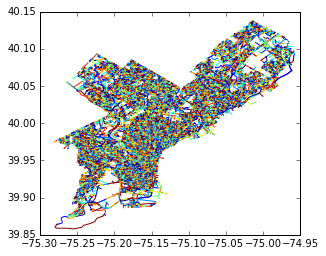

In [17]:
street_gpd.plot()

In [50]:
join_gb = joined.reset_index().groupby('OBJECTID').count()

In [51]:
join_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43488 entries, 1 to 43488
Data columns (total 7 columns):
index           43488 non-null int64
SEG_ID_left     43488 non-null int64
geometry        43488 non-null int64
CRASH_YEAR      43488 non-null int64
index_right     43488 non-null int64
SEG_ID_right    43488 non-null int64
STCL2_ID        43488 non-null int64
dtypes: int64(7)
memory usage: 2.7 MB


In [21]:
joined.shape

(67230, 7)

In [29]:
join_gb.shape

(43488, 7)

In [52]:
print(join_gb[join_gb.SEG_ID_right==0].shape[0], ' points spatially match no segment')
print(join_gb[join_gb.SEG_ID_right==1].shape[0], ' points spatially match 1 segment')
print(join_gb[join_gb.SEG_ID_right>1].shape[0], ' points spatially match multiple segments')

536  points spatially match no segment
31630  points spatially match 1 segment
11322  points spatially match multiple segments


In [31]:
join_gb.head().T

OBJECTID,1,2,3,4,5
index,1,2,1,1,1
SEG_ID_left,1,2,1,1,1
geometry,1,2,1,1,1
CRASH_YEAR,1,2,1,1,1
index_right,1,2,1,1,1
SEG_ID_right,1,2,1,1,1
STCL2_ID,1,2,1,1,1


In [41]:
philly_seg_stats.head().T

,0,1,2,3,4
SEG_ID,420708,422065,420702,420732,420718
SHAPE_LEN,449.863,540.083,446.104,447.261,148.216
geometry,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16529687686355 39.960013687935...,LINESTRING (-75.16537539004391 39.959601782423...,LINESTRING (-75.16694872703492 39.959805718080...


In [54]:
join_df = joined[['SEG_ID_left', 'OBJECTID']]

In [62]:
join_df.columns = ['SEG_ID', 'OBJECTID']
join_df.head().T
join_df.info()
philly_seg_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67230 entries, 0 to 43487
Data columns (total 2 columns):
SEG_ID      66695 non-null float64
OBJECTID    67230 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41022 entries, 0 to 41021
Data columns (total 3 columns):
SEG_ID       41022 non-null int64
SHAPE_LEN    41022 non-null float64
geometry     41022 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 961.5+ KB


In [77]:
join_df_numeric = join_df[['SEG_ID', 'OBJECTID']].dropna().astype(int)

In [78]:
join_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66695 entries, 0 to 43487
Data columns (total 2 columns):
SEG_ID      66695 non-null int64
OBJECTID    66695 non-null int64
dtypes: int64(2)
memory usage: 1.5 MB


In [135]:
collision_count = pd.DataFrame(join_df_numeric.groupby(['SEG_ID']).size().reset_index())
collision_count.columns = ['SEG_ID', 'collision_count']

In [136]:
collision_count.head().T

,0,1,2,3,4
SEG_ID,100002,100003,100006,100007,100008
collision_count,1,15,1,1,1


In [137]:
collision_count[collision_count.SEG_ID == 100003]

,SEG_ID,collision_count
1,100003,15


In [134]:
joined.shape

(67230, 7)

In [141]:
philly_collision_stats = philly_seg_stats.merge(collision_count, on = 'SEG_ID', how = 'inner')

In [142]:
philly_collision_stats.shape

(13186, 4)

In [152]:
philly_collision_stats['collision_count/length'] = philly_collision_stats.collision_count/philly_collision_stats.SHAPE_LEN

In [153]:
philly_collision_stats.head().T

,0,1,2,3,4
SEG_ID,420708,422065,420702,420732,420696
SHAPE_LEN,449.863,540.083,446.104,447.261,319.5
geometry,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16529687686355 39.960013687935...,LINESTRING (-75.16537539004391 39.959601782423...,LINESTRING (-75.16686813417091 39.960207835856...
collision_count,7,1,4,1,2
collsion_count/length,0.0155603,0.00185157,0.00896651,0.00223583,0.00625978
collision_count_norm,0.333648,0.111216,0.258235,0.111216,0.176273
collision_count/length,0.0155603,0.00185157,0.00896651,0.00223583,0.00625978


In [147]:
def normalize(col_name, df):
    col_name_norm = col_name + '_norm'
    df[col_name_norm] = df[col_name]+1
    df[col_name_norm] = np.log2(df[col_name_norm])
    df[col_name_norm] = df[col_name_norm]/df[col_name_norm].max()

In [154]:
normalize('collision_count', philly_collision_stats)
normalize('collision_count/length', philly_collision_stats)

In [155]:
philly_collision_stats.head().T

,0,1,2,3,4
SEG_ID,420708,422065,420702,420732,420696
SHAPE_LEN,449.863,540.083,446.104,447.261,319.5
geometry,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16371257852462 39.959816984389...,LINESTRING (-75.16529687686355 39.960013687935...,LINESTRING (-75.16537539004391 39.959601782423...,LINESTRING (-75.16686813417091 39.960207835856...
collision_count,7,1,4,1,2
collsion_count/length,0.0155603,0.00185157,0.00896651,0.00223583,0.00625978
collision_count_norm,0.333648,0.111216,0.258235,0.111216,0.176273
collision_count/length,0.0155603,0.00185157,0.00896651,0.00223583,0.00625978
collision_count/length_norm,0.00826819,0.000990576,0.00478006,0.00119592,0.00334159


In [157]:
def gradient_color(percent):
    min_color = np.array([255,255,255])
    max_color = np.array([65,105,255])
    return '#%02x%02x%02x' % tuple([int(k) for k in min_color+(max_color-min_color)*percent])

def write_var(col_name, var_name, df,f):
    df['color']=df[col_name].apply(gradient_color)
    f.write('var %s = %s;\n' % (var_name, df.to_json()))

with open('../visualization/Volumes of Collisions.js','w+') as f:
    write_var('collision_count_norm', 'collision_count', philly_collision_stats,f)
    write_var('collision_count/length_norm', 'collision_count_norm', philly_collision_stats,f)

In [162]:
philly_collision_stats[philly_collision_stats.SEG_ID==422279]

,SEG_ID,SHAPE_LEN,geometry,collision_count,collsion_count/length,collision_count_norm,collision_count/length,collision_count/length_norm,color
1674,422279,2360.798811,LINESTRING (-75.18428206823198 39.949500166985...,270,0.114368,0.898863,0.114368,0.057987,#f3f6ff


In [165]:
collision_gpd[collision_gpd.SEG_ID==422279.0]

,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_MAJ_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,BUS_COUNT,COLLISION_TYPE,COMM_VEH_COUNT,CRASH_MONTH,...,TIME_OF_DAY,UNBELTED_OCC_COUNT,UNB_DEATH_COUNT,UNB_MAJ_INJ_COUNT,UNK_INJ_DEG_COUNT,UNK_INJ_PER_COUNT,VAN_COUNT,VEHICLE_COUNT,WEATHER,geometry
137,1,0,0,0,0,0,0,7,0,8,...,935,0,0,0,0,0,0,1,1,POINT (-75.18744029819194 39.94735998737308)
957,1,0,0,0,0,0,0,1,0,4,...,1203,0,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
1321,2,0,0,0,0,0,0,5,0,2,...,106,1,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
1778,1,0,0,0,0,0,0,4,1,3,...,1005,0,0,0,0,1,0,2,2,POINT (-75.18744029819194 39.94735998737308)
2821,2,0,0,0,0,0,0,4,0,12,...,723,0,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
2876,0,0,0,0,0,0,0,5,0,3,...,2353,4,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
2925,1,0,0,0,0,0,0,1,0,1,...,1041,0,0,0,1,0,1,2,1,POINT (-75.18744029819194 39.94735998737308)
4094,1,0,0,0,0,0,0,5,1,10,...,1134,0,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
5421,2,0,0,0,0,0,0,1,0,11,...,1425,0,0,0,0,0,0,2,1,POINT (-75.18744029819194 39.94735998737308)
5693,1,0,0,0,0,0,0,1,0,12,...,1328,0,0,0,0,0,0,3,1,POINT (-75.18744029819194 39.94735998737308)
